# K-Means Clustering from Scratch

## Assignment A
**Goal:** Implement K-Means clustering algorithm from scratch and compare it with `sklearn.cluster.KMeans`.

**Dataset:** [Iris Dataset](https://paperswithcode.com/dataset/iris) (loaded via `sklearn.datasets` for convenience as it is the same standard dataset).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Set random seed for reproducibility
np.random.seed(17)

## 1. Load and Prepare Data
We use the Iris dataset. We'll drop the labels for clustering but keep them for reference if needed (though we won't use them for training).

In [2]:
iris = load_iris()
X = iris.data
y = iris.target

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(f"Data shape: {X_scaled.shape}")

Data shape: (150, 4)


## 2. Implement K-Means from Scratch

The K-Means algorithm involves:
1. **Initialization**: Randomly select `k` centroids.
2. **Assignment**: Assign each data point to the nearest centroid.
3. **Update**: Recalculate centroids as the mean of assigned points.
4. **Repeat**: Repeat steps 2 and 3 until convergence (centroids don't change significantly) or max iterations reached.

In [3]:
class KMeansScratch:
    def __init__(self, n_clusters=3, max_iter=250, tol=1e-5):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.tol = tol
        self.centroids = None
        self.labels = None

    def fit(self, X):
        # 1. Initialization
        # Randomly choose k data points as initial centroids
        indices = np.random.choice(X.shape[0], self.n_clusters, replace=False)
        self.centroids = X[indices]

        for i in range(self.max_iter):
            # 2. Assignment
            # Compute distances from each point to each centroid
            # Shape: (n_samples, n_clusters)
            distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
            self.labels = np.argmin(distances, axis=1)

            # 3. Update
            new_centroids = np.array([X[self.labels == k].mean(axis=0) for k in range(self.n_clusters)])

            # Check for convergence
            if np.all(np.abs(new_centroids - self.centroids) < self.tol):
                print(f"Converged at iteration {i}")
                break

            self.centroids = new_centroids

        return self

    def predict(self, X):
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
        return np.argmin(distances, axis=1)

## 3. Train and Evaluate Models

We'll train both our scratch implementation and the scikit-learn implementation.

In [4]:
# Scratch Implementation
kmeans_scratch = KMeansScratch(n_clusters=3)
kmeans_scratch.fit(X_scaled)
labels_scratch = kmeans_scratch.labels

# Sklearn Implementation
kmeans_sklearn = KMeans(n_clusters=3, random_state=17, n_init=15)
kmeans_sklearn.fit(X_scaled)
labels_sklearn = kmeans_sklearn.labels_

# Evaluation Metrics
print("--- Scratch Implementation Metrics ---")
print(f"Silhouette Score: {silhouette_score(X_scaled, labels_scratch):.4f}")
print(f"Davies-Bouldin Score: {davies_bouldin_score(X_scaled, labels_scratch):.4f}")

print("\n--- Sklearn Implementation Metrics ---")
print(f"Silhouette Score: {silhouette_score(X_scaled, labels_sklearn):.4f}")
print(f"Davies-Bouldin Score: {davies_bouldin_score(X_scaled, labels_sklearn):.4f}")

Converged at iteration 6
--- Scratch Implementation Metrics ---
Silhouette Score: 0.4630
Davies-Bouldin Score: 0.8324

--- Sklearn Implementation Metrics ---
Silhouette Score: 0.4599
Davies-Bouldin Score: 0.8336


## 4. Visual Analysis

Since Iris is 4D, we use PCA to reduce it to 2D for visualization.

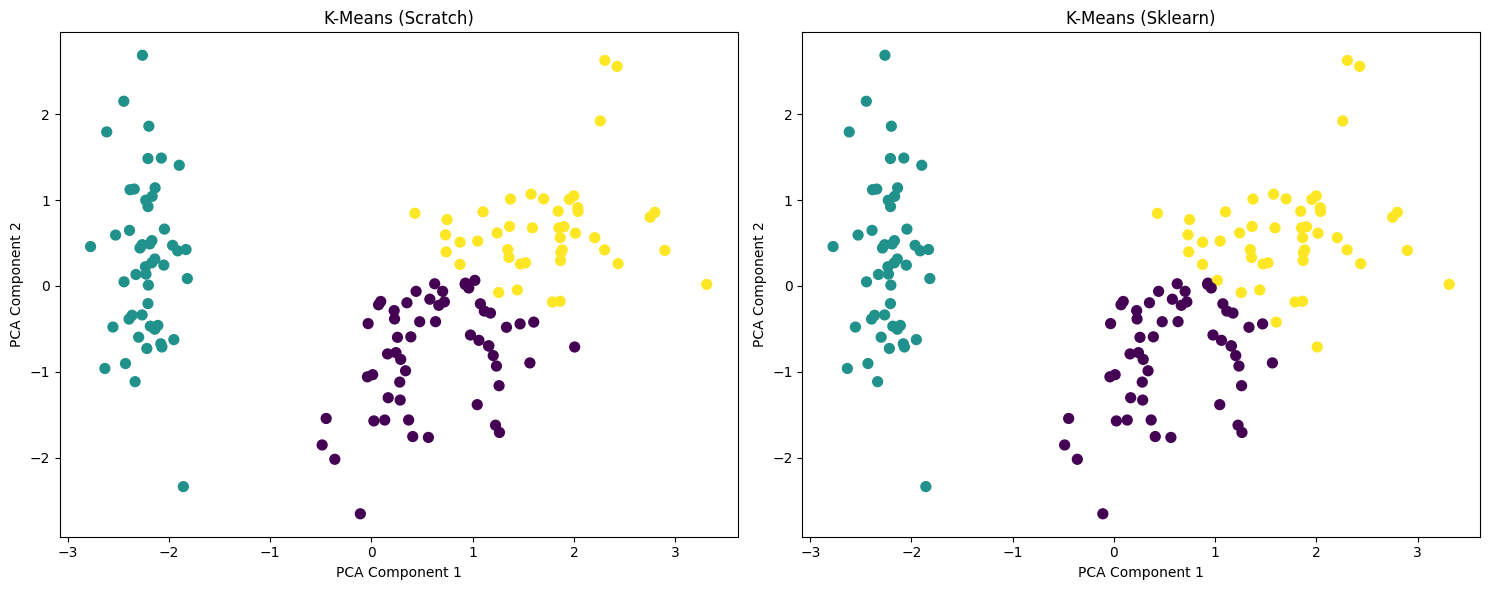

In [5]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot Scratch Results
axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=labels_scratch, cmap='viridis', s=50)
axes[0].set_title('K-Means (Scratch)')
axes[0].set_xlabel('PCA Component 1')
axes[0].set_ylabel('PCA Component 2')

# Plot Sklearn Results
axes[1].scatter(X_pca[:, 0], X_pca[:, 1], c=labels_sklearn, cmap='viridis', s=50)
axes[1].set_title('K-Means (Sklearn)')
axes[1].set_xlabel('PCA Component 1')
axes[1].set_ylabel('PCA Component 2')

plt.tight_layout()
plt.show()

## Conclusion
We successfully implemented K-Means from scratch and achieved comparable results to the optimized scikit-learn implementation. The clustering quality metrics (Silhouette and Davies-Bouldin) confirm the effectiveness of the algorithm on the Iris dataset.